In [179]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'font.sans-serif':'Calibri'})


In [180]:
data_file = '../results/fit.csv'
paramsGen, errorsGen, paramsR, errorsR, paramsL, errorsL, paramsC, errorsC = np.loadtxt(data_file, delimiter = ',', skiprows = 1,usecols=(0,1,2,3,4,5,6,7) ,unpack = True)

print('V_0    = ','{:.5f}'.format(paramsGen[0]), '±', '{:.5f}'.format(errorsGen[0]), ' V')

print()
print('R_r  = ','{:.3f}'.format(paramsR[0]), '±', '{:.3f}'.format(errorsR[0]), 'Ohm')
print('R    = ','{:.3f}'.format(paramsR[1]), '±', '{:.3f}'.format(errorsR[1]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsR[2]), '±', '{:.5f}'.format(errorsR[2]), ' Henry')
print('C    = ','{:.12f}'.format(paramsR[3]), '±', '{:.12f}'.format(errorsR[3]), ' F')
print('V_0  = ','{:.4f}'.format(paramsR[4]), '±', '{:.4f}'.format(errorsR[4]), ' V')

print()
print('R    = ','{:.3f}'.format(paramsL[0]), '±', '{:.3f}'.format(errorsL[0]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsL[1]), '±', '{:.5f}'.format(errorsL[1]), ' Henry')
print('C    = ','{:.12f}'.format(paramsL[2]), '±', '{:.12f}'.format(errorsL[2]), ' F')
print('V_0    = ','{:.3f}'.format(paramsL[3]), '±', '{:.10f}'.format(errorsL[3]), ' V')

print()
print('R    = ','{:.3f}'.format(paramsC[0]), '±', '{:.3f}'.format(errorsC[0]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsC[1]), '±', '{:.5f}'.format(errorsC[1]), ' Henry')
print('C    = ','{:.12f}'.format(paramsC[2]), '±', '{:.15f}'.format(errorsC[2]), ' F')
print('V_0    = ','{:.4f}'.format(paramsC[3]), '±', '{:.4f}'.format(errorsC[3]), ' V')

V_0    =  2.50000 ± 0.01000  V

R_r  =  1011.830 ± 7.190 Ohm
R    =  1139.030 ± 7.550 Ohm
L    =  0.04709 ± 0.00017  Henry
C    =  0.000000001523 ± 0.000000000005  F
V_0  =  2.4455 ± 0.0113  V

R    =  2131.330 ± 0.009 Ohm
L    =  0.04564 ± 0.00000  Henry
C    =  0.000000001561 ± 0.000000000000  F
V_0    =  2.436 ± 0.0000069577  V

R    =  1912.200 ± 0.006 Ohm
L    =  0.04079 ± 0.00000  Henry
C    =  0.000000001773 ± 0.000000000000003  F
V_0    =  2.4269 ± 0.0000  V


In [181]:
def Gen_amp_model(f, V_0):
    return V_0
def R_amp_model(f, R_r , R, L, C, V_0):
    num = R_r * V_0
    den = np.sqrt( (R_r+R)**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den
def L_amp_model(f, R, L, C, V_0):
    num = 2*np.pi*f * L * V_0
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den
def C_amp_model(f, R, L, C, V_0):
    num = V_0 / (2*np.pi*f * C)
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den

f = np.linspace(5000,35000,1000)


ampGen = np.full((len(f), 1),paramsGen[0])
ampR = R_amp_model(f,paramsR[0],paramsR[1],paramsR[2],paramsR[3],paramsR[4])
ampL = L_amp_model(f,paramsL[0],paramsL[1],paramsL[2],paramsL[3])
ampC = C_amp_model(f,paramsC[0],paramsC[1],paramsC[2],paramsC[3])

In [182]:
data_file = '../data/III session/Frequency response/amplitudes_fino35kHz.csv'
frequencies, amplitudeGen, amplitudeR, amplitudeL, amplitudeC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)

# Fit 4 canali ampiezze

In [183]:
error = .0002

error *= 200

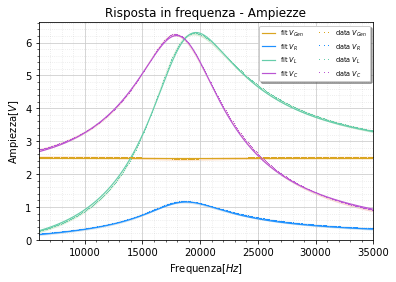

In [184]:
fig, axs = plt.subplots()
l0, = axs.plot(f,ampGen,color='goldenrod',linestyle='solid',linewidth=1.2)
l1, = axs.plot(f,ampR,color='dodgerblue',linestyle='solid',linewidth=1.2)
l2, = axs.plot(f,ampL,color='mediumaquamarine',linestyle='solid',linewidth=1.2)
l3, = axs.plot(f,ampC,color='mediumorchid',linestyle='solid',linewidth=1.2)
axs.set_xlim(6000,35000)
axs.set_ylim(0)
axs.set_title(r'Risposta in frequenza - Ampiezze',fontname='Calibri')
axs.set_xlabel(r'Frequenza$[Hz]$',fontname='Calibri')
axs.set_ylabel(r'Ampiezza$[V]$')
axs.grid(visible=True, which='major', color='0.8', linestyle='-')
axs.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axs.minorticks_on()

###### Experimental data
m0 , = axs.plot(frequencies,amplitudeGen,marker=',',markersize=2,linestyle='None',color='goldenrod')
m1, = axs.plot(frequencies,amplitudeR,marker=',',markersize=2,linestyle='None',color='dodgerblue')
m2, = axs.plot(frequencies,amplitudeL,marker=',',markersize=2,linestyle='None',color='mediumaquamarine')
m3, = axs.plot(frequencies,amplitudeC,marker=',',markersize=2,linestyle='None',color='mediumorchid')

axs.fill_between(frequencies, amplitudeR - error, amplitudeR + error, alpha=0.2)
axs.fill_between(frequencies,amplitudeGen - error, amplitudeGen + error,alpha=0.2)
axs.fill_between(frequencies,amplitudeL - error, amplitudeL + error,alpha=0.2)
axs.fill_between(frequencies,amplitudeC - error, amplitudeC + error,alpha=0.2)
# axs.fill_between(f, ampR - error, ampR + error, alpha=0.2)
# axs.fill_between(f,ampGen - error, ampGen + error,alpha=0.2)
# axs.fill_between(f,ampL - error, ampL + error,alpha=0.2)
# axs.fill_between(f,ampC - error, ampC + error,alpha=0.2)

axs.legend((l0, l1, l2, l3, m0 ,m1,m2,m3), (r'fit $V_{Gen}$','fit $V_R$', 'fit $V_L$','fit $V_C$','data $V_{Gen}$','data $V_R$','data $V_L$','data $V_C$'),ncol=2, loc='upper right', shadow=True,fancybox=True,fontsize=6.5,handler_map={m0: HandlerLine2D(numpoints=3),m1: HandlerLine2D(numpoints=3),m2: HandlerLine2D(numpoints=3),m3: HandlerLine2D(numpoints=3)})
plt.savefig('../figs/Risposta-in-frequenza-ampiezze.pdf')

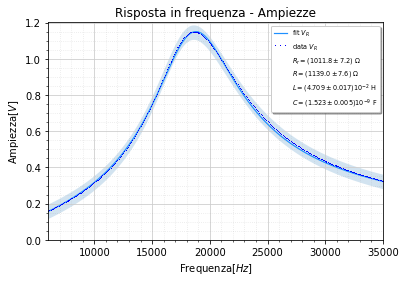

In [185]:
fig_, axs_ = plt.subplots()
l0, = axs_.plot(f,ampR,color='dodgerblue',linestyle='solid',linewidth=1.2)
R_r, = axs_.plot([], [], ' ', label="Extra label on the legend")
R, = axs_.plot([], [], ' ', label="Extra label on the legend")
L, = axs_.plot([], [], ' ', label="Extra label on the legend")
C, = axs_.plot([], [], ' ', label="Extra label on the legend")

axs_.set_xlim(6000,35000)
axs_.set_ylim(0)
axs_.set_title(r'Risposta in frequenza - Ampiezze',fontname='Calibri')
axs_.set_xlabel(r'Frequenza$[Hz]$',fontname='Calibri')
axs_.set_ylabel(r'Ampiezza$[V]$')
axs_.grid(visible=True, which='major', color='0.8', linestyle='-')
axs_.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axs_.minorticks_on()

###### Experimental data
m0, = axs_.plot(frequencies,amplitudeR,marker=',',markersize=2,linestyle='None',color='blue')


axs_.fill_between(frequencies, amplitudeR - error, amplitudeR + error, alpha=0.2)

# axs.fill_between(f, ampR - error, ampR + error, alpha=0.2)
strR_r = '$R_r = (1011.8 \pm 7.2) \ \Omega$'
strR = '$R = (1139.0 \pm 7.6) \ \Omega$'
strL = '$L = (4.709 \pm 0.017)10^{-2}$ H'
strC = '$C = (1.523 \pm 0.005)10^{-9}$ F'
axs_.legend((l0, m0, R_r,R,L,C), (r'fit $V_R$','data $V_R$',strR_r,strR,strL,strC),ncol=1, loc='upper right', shadow=True,fancybox=True,fontsize=6.5,handler_map={m0: HandlerLine2D(numpoints=3)})
# axs_.legend([],[],title='Parametri fit',label='prova')
plt.savefig('../figs/Risposta-in-frequenza-ampiezza-resistenza.pdf')